<a href="https://colab.research.google.com/github/sathish-ekanayaka/Predicting-the-first-innings-score-of-an-odi-cricket-match./blob/main/Predicting_the_first_innings_score_of_an_odi_cricket_match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount("/content/drive/")

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from google.colab import files
import os 
import glob



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
os.chdir(r'/content/drive/My Drive/Colab Notebooks/MLproject/cricketdata') #changes folder path to working directory

filelist=glob.glob('*.csv') #creates a list of all csv files in the folder.

In [20]:
matches=[]
detail=[]
teamsandcity=[]
odiallmatches=[]
firstbatscore=[]
dframeprev = pd.DataFrame()

for file in filelist: # Looping through the csv files in the folder.
  
  try:
    df=pd.read_csv(file, skiprows=20, header=None) #Creating a dataframe for each csv file.
    match=df.to_numpy()  #Converting each dataframe into a numpy array
    matches.append(match) #Updating a list of numpy arrays.
  except:
    pass

#Extracting necessary features from each csv file.(Number of overs,Number of wickets,Runs at the instance,Batsman1score,Batsman2score,Current pathnership.) 
for i,file in zip(matches,filelist):
  batfirst=i[np.where(i[:,1]==1)]  
  batsecond=i[np.where(i[:,1]==2)]

  numberofovers=batfirst[:,2]
  runs=batfirst[:,7]+batfirst[:,8]
  runsataninstance=np.cumsum(batfirst[:,7]+batfirst[:,8])


  batter1=batfirst[:,4]
  batter2=batfirst[:,5]
  batter1runs=batfirst[:,7]
  batter2runs=batfirst[:,8]
  batter1score=[]
  batter2score=[]
  m=0
  u=0
  temp=0
  for p,q,r,s in zip(range(0,len(batter1)),range(0,len(batter2)),batter1runs,batter2runs):
    m+=r
    u+=s
    batter1score.append(m)
    batter2score.append(u)
    temp=0
    if batter1[p]==batter1[p-1] and batter2[q]==batter2[q-1]:
      continue
    elif batter1[p]==batter2[q-1] and batter2[q]==batter1[p-1]:
      temp=m
      m=u
      u=temp
      
     
    elif batter1[p]!=batter1[p-1] and batter2[q]==batter2[q-1]: 
      m=0
      
    elif batter1[p]==batter1[p-1] and batter2[q]!=batter2[q-1]:
      u=0
      
    elif batter1[p]==batter2[q-1] and batter2[q]!=batter1[p-1]:
      m=u
      u=0
      
    else:
      u=m
      m=0
  
  
  finalscore=[]
  for j in batfirst:
    finalscore.append(runsataninstance[-1])

  wickets=[]
  j=0
  for i in batfirst[:,9]:
    if i == 'bowled':
      j=1
    elif i=='caught':
      j=1
    elif i=='run out':
      j=1
    elif i=='stumped':
      j=1
    elif i=='lbw':
      j=1
    else:
      j=0
    wickets.append(j)

    fallofwickets=np.cumsum(wickets)

  if fallofwickets[-1]<10 and numberofovers[-1]<49.6:
    continue


  pathnerships=[]
  pathner=0

  for (p,r) in zip(range(0,len(fallofwickets)),runs):
    if fallofwickets[p]==fallofwickets[p-1]:
      pathner=pathner+r
      pathnerships.append(pathner)
    else:
      pathner=0
      pathnerships.append(pathner)


 
  detail=pd.read_csv(file,header=None,sep='\n') 
  details=detail[0:10]
  details.loc[[1,2,8]]
  details=details.to_numpy()
  data=details[[1,2,8]]
  matchinfo=[]
  for d in data:
    for h in d:
      matchinfo.append(h)
  teamsandcity=[]
  for j in matchinfo:
    neededdetails = j.split(",")
    teamsandcity.append(neededdetails)
  batteam=teamsandcity[0][2]
  bowlteam=teamsandcity[1][2]
  venue=teamsandcity[2][2]

  battingteam = []
  bowlingteam = []
  city = []
  for k in batfirst:
    battingteam.append(batteam)
    bowlingteam.append(bowlteam)
    city.append(venue)
  battingteam=np.array(battingteam)
  bowlingteam=np.array(bowlingteam)
  city=np.array(city)

  finalscore=np.array(finalscore)
  pathnerships=np.array(pathnerships)
  runsataninstance=np.array(runsataninstance)
  fallofwickets=np.array(fallofwickets)
  numberofovers=np.array(numberofovers)
  batter1score=np.array(batter1score)
  batter2score=np.array(batter2score)

  odimatchdata=[numberofovers,fallofwickets,runsataninstance,batter1score,batter2score,pathnerships,battingteam,bowlingteam,city,finalscore]
  dframe=pd.DataFrame(odimatchdata)
  d=dframe.T
  d=d.iloc[124:,:]
  dframeprev=dframeprev.append(d)#Combining all the dataframes into a one dataframe for apply machine learning algorithms.
  

  

In [21]:
dframeprev = dframeprev.set_axis(['Overs', 'Wickets', 'Runsatinstance', 'Batsman1score', 'Batsman2score','Currentpathnership','Battingteam','Bowlingteam','Venue','Finalscore'], axis=1, inplace=False)

In [22]:
dframeprev

,Overs,Wickets,Runsatinstance,Batsman1score,Batsman2score,Currentpathnership,Battingteam,Bowlingteam,Venue,Finalscore
124,20.3,1,121,52,24,40,India,Australia,Saurashtra Cricket Association Stadium,340
125,20.4,1,121,52,24,40,India,Australia,Saurashtra Cricket Association Stadium,340
126,20.5,1,122,53,24,41,India,Australia,Saurashtra Cricket Association Stadium,340
127,20.6,1,123,54,24,42,India,Australia,Saurashtra Cricket Association Stadium,340
128,21.1,1,124,25,54,43,India,Australia,Saurashtra Cricket Association Stadium,340
...,...,...,...,...,...,...,...,...,...,...
305,49.2,5,256,26,12,24,South Africa,Sri Lanka,Adelaide Oval,262
306,49.3,6,256,12,26,0,South Africa,Sri Lanka,Adelaide Oval,262
307,49.4,6,257,13,26,1,South Africa,Sri Lanka,Adelaide Oval,262
308,49.5,6,261,30,0,5,South Africa,Sri Lanka,Adelaide Oval,262


In [23]:
for column in dframeprev.columns:
  print(column," :" ,len(dframeprev[column].unique()))

Overs  : 278
Wickets  : 11
Runsatinstance  : 430
Batsman1score  : 230
Batsman2score  : 209
Currentpathnership  : 328
Battingteam  : 25
Bowlingteam  : 25
Venue  : 188
Finalscore  : 281


In [24]:
x = dframeprev.iloc[:,[0,1,2,3,4,5]].values #Selecting the features,Number of overs,Number of wickets,Runs at the instance,Batsman1score,Batsman2score,Current pathnership respectively
y = dframeprev.iloc[:,9].values #This is the value we are going to predict.

from sklearn.model_selection import train_test_split #Importing the function for slice the dataset into training and testing data sets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) #Selecting 25% data rows randomly as test data.

In [25]:
#Feature scaling the data as a preprocessing step.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,max_features=None,random_state=5)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [27]:
#We only changed the number of decision trees as the hyperparameter. So, below list shows the number of trees we used at each iteration
iterations=[5,10,20,50,100,200,500]




In [28]:
#To eveluate our model we have defined this custom function. By using this we can find the percentage of times we have predicted the score closer than 15 runns.
def success_rate(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)



#To find how the success rate and covarience change with respected to the number of decision trees in the forest.
from sklearn.ensemble import RandomForestRegressor
r_scores=[]
successes=[]
for r in iterations:
  model = RandomForestRegressor(n_estimators=r,max_features=None,random_state=5)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  score = model.score(x_test,y_test)*100
  success=success_rate(y_test,y_pred,15)
  r_scores.append(score)
  successes.append(success)

In [29]:
#From this process we hope to predict the final score of the 1st innigs of a cricket match by feeding some data of a particular instance of that paticular match
#The dofferece between real and predicted score is expected to be less than 15 runs. So by using test data we have written a function to calculate our sucees rate.
#And it is given by custom accuracy.
def success_rate(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

y_pred = model.predict(x_test)
score = model.score(x_test,y_test)*100
print("R-squared value:" , score)
print("Success rate:" , success_rate(y_test,y_pred,15))

R-squared value: 93.20666213782386
Success rate: 79.51226371507202


In [30]:
import numpy as np
#Here you can give the number of overs,wickets,current score,runs scored by the striker,runs scored by the non striker and current patnership respectively to predict tthe final score.
new_prediction = model.predict(sc.transform(np.array([[20,2,130,40,40,60]])))
print("Prediction score:" , new_prediction)

Prediction score: [337.126]


In [31]:
#Selecting a 100 random moments from matches and predict their final score. Then we plotted the predicted score vs actual scores corresponding to those moments.
import random
randommatches = []
for i in range(0,100):
  n = random.randint(0,len(y_test))
  randommatches.append(n)


realscores=[]
predscores=[]
for j in range(0,len(randommatches)):
  realscores.append(y_test[randommatches[j]])
  predscores.append(y_pred[randommatches[j]])




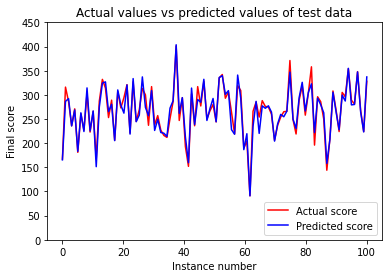

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 100)
y1 = realscores
y2 = predscores

image=plt.figure()
plt.plot(x, y1, "-r", label="Actual score")
plt.plot(x, y2, "-b", label="Predicted score")
plt.legend(loc="lower right")
plt.title("Actual values vs predicted values of test data")
plt.xlabel("Instance number")
plt.ylabel("Final score")
plt.ylim(0,450)
plt.show()
image.savefig('image.png', dpi=1000)




In [33]:
successes

[75.09089813382616,
 77.20013659830056,
 78.21859745686105,
 79.13059199292903,
 79.45400855748177,
 79.39575339989152,
 79.51226371507202]

In [34]:
dframeprev = dframeprev.drop(dframeprev.columns[[6, 7, 8]], axis=1)  #

In [35]:
dframeprev

,Overs,Wickets,Runsatinstance,Batsman1score,Batsman2score,Currentpathnership,Finalscore
124,20.3,1,121,52,24,40,340
125,20.4,1,121,52,24,40,340
126,20.5,1,122,53,24,41,340
127,20.6,1,123,54,24,42,340
128,21.1,1,124,25,54,43,340
...,...,...,...,...,...,...,...
305,49.2,5,256,26,12,24,262
306,49.3,6,256,12,26,0,262
307,49.4,6,257,13,26,1,262
308,49.5,6,261,30,0,5,262


In [36]:
r_scores

[90.49361057101663,
 91.89089741694167,
 92.60778011471099,
 92.99241845230117,
 93.12618977278422,
 93.18389740048522,
 93.20666213782386]

In [37]:
successes

[75.09089813382616,
 77.20013659830056,
 78.21859745686105,
 79.13059199292903,
 79.45400855748177,
 79.39575339989152,
 79.51226371507202]

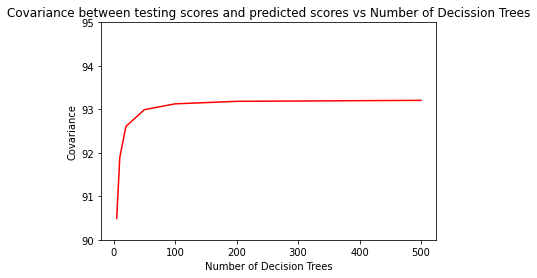

In [38]:
#THe change of covarience between predicted and actual score with respect to the number of decision trees.
covariance=plt.figure()
plt.plot(iterations,r_scores, "-r") #label="Covarience between actual and predicted scores")
#plt.plot(iterations,successes, "-b")
#plt.legend()
plt.title("Covariance between testing scores and predicted scores vs Number of Decission Trees")
plt.xlabel("Number of Decision Trees")
plt.ylabel("Covariance")
plt.ylim(90,95)
plt.show()
covariance.savefig('covariance.png', dpi=1000)

In [41]:
columns=['Number of Overs','Number of Wickets','Runsatinstance','Batsman1 Score','Batsman2 Score','Current Pathnership']

'''
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, x_test, y_test)
featureimportance=plt.figure()
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(columns, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
featureimportance.savefig('featureimportance.png', dpi=1000)'''


'\nfrom sklearn.inspection import permutation_importance\nperm_importance = permutation_importance(model, x_test, y_test)\nfeatureimportance=plt.figure()\nsorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(columns, perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Feature Importance")\nfeatureimportance.savefig(\'featureimportance.png\', dpi=1000)'

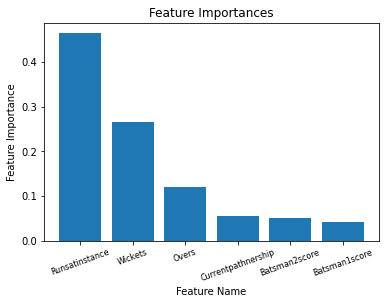

In [42]:

featureimportance=plt.figure()

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [dframeprev.columns[i] for i in indices]



plt.bar(range(x_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
# Show plot
plt.show()
featureimportance.savefig('featureimportance.png', dpi=1000)